(visualization:matplotlib:animations)=
# Animations

Matplotlib comes with different techniques for animated plots. Here we concentrate on [`FuncAnimation`](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html) objects.

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

An animation is a sequence of *frames*. A frame is an image (a Matplotlib plot). Typical frame rates range from 15 to 30 frames per second (fps).

Basic steps for creating an animation are:

1. Create figure and axes.
2. Create plot.
3. Write an update function which modifies the animated objects every time step.
4. Create a `FuncAnimation` object.

Matplotlib supports different update techniques:

* Take the plot of the previous frame and modify it to get the next frame.
* Redraw all objects in every frame.
* Redraw all objects in every frame, but use a background image that contains all unanimated objects. This is called *blitting*.

For simple animations the first technique is a good choice. For more complex animations redrawing everything simplifies code, but may slow down the animation. Blitting speeds up complex animations, but requires some additional lines of code.

## Animations without Blitting

For figures with only few animated objects updating only these objects is efficient and yields readable code.

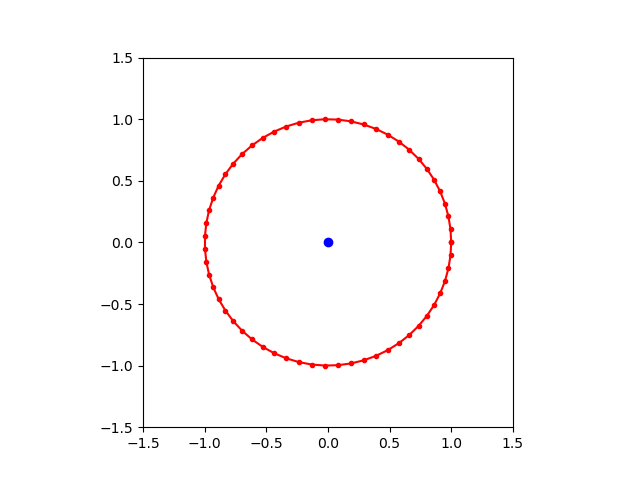

In [2]:
duration = 1000    # length of animation in milliseconds
fps = 20    # frames per second
n_frames = int(fps * duration / 1000)    # total number of frames

# figure and axes
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')

# circle (not animated)
t = np.linspace(0, 2 * np.pi, 60)
ax.plot(np.cos(t), np.sin(t), '-r.')

# line (animated)
line = ax.plot(0, 0, '-ob')[0]

# update function
def update_animation(frame):
    angle = -2 * np.pi / n_frames * frame
    line.set_data([0, np.cos(angle)], [0, np.sin(angle)])

# start animation
fa = anim.FuncAnimation(fig, update_animation, frames=n_frames, interval=1000/fps)

plt.show()

````{hint}
Getting Matplotlib animations to render correctly in Jupyter Lab is sometimes more difficult than expected. Install the `ipympl` package and use the `%matplotlib widget` magic. If this doesn't work try HTML/JS export of the animation and render it's output in Jupyter Lab:
```python
from IPython.display import HTML

display(HTML(fa.to_jshtml()))
```
````

If there are many animated objects or if objects have to be created or removed during animation, then redrawing everything is a good choice to keep code readable. For easy comparison we use the same animation as above, but with complete redrawing.

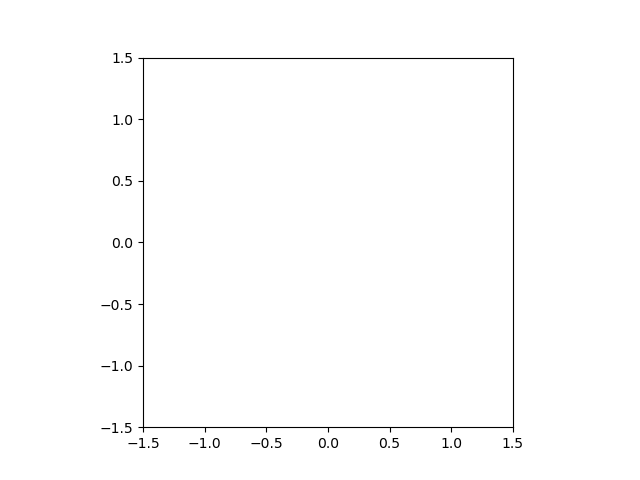

In [3]:
duration = 1000    # length of animation in milliseconds
fps = 20    # frames per second
n_frames = int(fps * duration / 1000)    # total number of frames

# figure and axes
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')

# update function
def update_animation(frame):

    ax.clear()

    t = np.linspace(0, 2 * np.pi, 60)
    ax.plot(np.cos(t), np.sin(t), '-r.')

    angle = -2 * np.pi / n_frames * frame
    ax.plot([0, np.cos(angle)], [0, np.sin(angle)], '-ob')

# start animation
fa = anim.FuncAnimation(fig, update_animation, frames=n_frames, interval=1000/fps)

plt.show()

## Animations with Blitting

When blitting is enabled, Matplotlib starts each frame with a fixed background image and adds the animated objects.

To get the background image, Matplotlib calls the update function once (draws the first frame) and removes the animated objects. To tell Matplotlib which objects are not part of the background the update function has to return a list of all animated objects.

If Matplotlib shall not use the first frame to figure out the background image, an additional initialization function can be provided, which has to return a list of objects drawn but not belonging to the background. Usually that is empty.

In both cases the update function for each frame has to return a list of all animated (that is, created or modified) objects. Objects not in the list will disappear.

```{important}
Note that some Matplotlib backends do not support blitting and play the animation without blitting, resulting in a messed up animation. This is the case for animations in JupyterLab! To see correct results of the code below, run it in a simple Python shell.
```

Blitting not supported by backend.


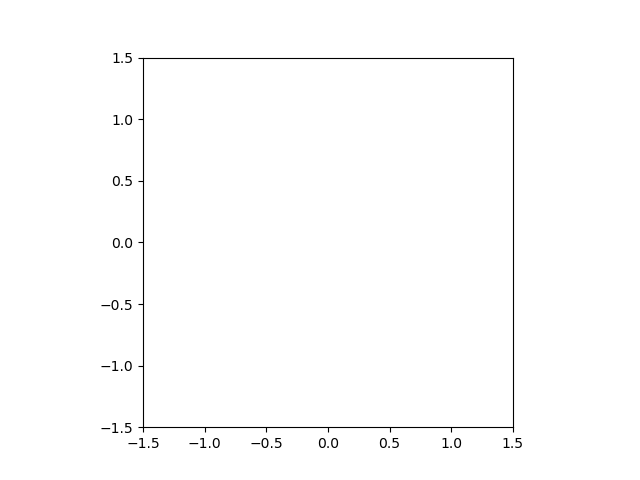

In [4]:
duration = 1000    # length of animation in milliseconds
fps = 20    # frames per second
n_frames = int(fps * duration / 1000)    # total number of frames

# figure and axes
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')

# check blitting support
if not fig.canvas.supports_blit:
    print('Blitting not supported by backend.')

# initialization function (draws circle)
def init_animation():
    t = np.linspace(0, 2 * np.pi, 60)
    ax.plot(np.cos(t), np.sin(t), '-r.')
    return []

# update function (draws line)
def update_animation(frame):
    angle = -2 * np.pi / n_frames * frame
    line = ax.plot([0, np.cos(angle)], [0, np.sin(angle)], '-ob')[0]
    return [line]

# start animation
fa = anim.FuncAnimation(fig, update_animation, init_func=init_animation,
                        frames=n_frames, interval=1000/fps, blit=True)

plt.show()

## Saving animations

Matplotlib animations can be saved as animated GIFs or in different video formats.

```{important}
Blitting does not work for saved animations. If you intend to save an animation, don't use blitting.
```

In [5]:
fa.save('anim.gif', writer='imagemagick')
fa.save('anim.mp4', writer='ffmpeg')